## Exploratory Data Analysis: Mental Health in Tech Survey (2014)

"This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace." The data set and a description of the data are made available at: https://www.kaggle.com/osmi/mental-health-in-tech-survey. The data set was downloaded on February 4, 2018.

#### Introduction
I'm conducting this analysis to practice my analysis and Python skills on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. I'll note my observations with each step in order to explain how I think through and approach the data set. I'll also note questions that arise at each step, although I won't explore all of them in this analysis. 

(I'm going to let myself do a bit more explaining throughout this analysis than I might normally do in other settings, because I hope that by erring on the side of too much detail, it will be helpful to others who are learning, too!)

Kaggle suggested two questions to explore, which I will also address in my analysis. Kaggle's questions are:

- How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
- What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

This analysis is a living document and I am continuing to deepen the exploration with each iteration.  I will update this occasionally with the latest version. Thank you for reading! I welcome your questions or comments. -Liz


### Table of Contents
- <a href="#step1">Step 1: Understand where the data came from</a>
- <a href="#step2">Step 2: Load the data and packages</a>
- <a href="#step3">Step 3: Inspect the data to begin understanding it/ data profiling</a>
- <a href="#step4">Step 4: Clean up the data as identified in Step 3</a>
- <a href="#step5">Step 5: Identify patterns in the data</a>
- <a href="#step6">Step 6: Answer Kaggle's questions about the data</a>

<a id="step1"></a> 
### Step 1: Understand where the data came from

a. How was it collected? 

- Name: "Annual Mental Health in Tech Survey"
- Sponsoring Organization: Open Sourcing Mental Illness (OSMI)
- Year: 2014
- Description: "With over 1200 responses, we believe the 2014 Mental Health in Tech Survey was the largest survey done on mental health in the tech industry." Since then, OSMI has conducted two more surveys, 2016 and 2017.
- The original dataset is from Open Sourcing Mental Illness  (OSMI) and can be downloaded here. (https://osmihelp.org/research/) 
- We do not have access to information about their data collection methods.

b/c. Is it a sample, and was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample (the survey link is available on their website), so we can assume that it is not representative.

d.	Was the dataset transformed in any way?
- Unknown.

e.	Are there some known problems on the dataset?
- Based on the previous analyses of the data (posted on Kaggle), <strong>Gender</strong> and <strong>Age</strong> will need to be cleaned up.
- It does <em>not</em> appear that the survey was administered to a representative sample and so, we won't be able to generalize the findings to a broader population. 

<a id="step2"></a> 
### Step 2: Load the data and packages

In [1]:
# Import packages
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 

# Ignore warning related to pandas_profiling (https://github.com/pandas-profiling/pandas-profiling/issues/68)
import warnings
warnings.filterwarnings('ignore') 

# Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
# This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 100) 

# Load in the dataset as mh
mh = pd.read_csv("/home/alexiss/Desktop/survey.csv")

<a id="step3"></a> 
### Step 3: Inspect the data to begin to understand it / Data Profiling
I am adapting the process outlined here: https://www.datacamp.com/community/tutorials/python-data-profiling

Review the data types and sample data. What variables am I dealing with? Which variables need to be transformed in some way before they can be analyzed? After the code, I'll note some observations.

In [2]:
# Display the data type for each variable
mh.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [3]:
# Display the first five rows of the data set
mh.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Display a random 10 rows from the data set
mh.sample(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
311,2014-08-27 14:24:15,35,male,United States,OR,No,No,Yes,Rarely,100-500,No,Yes,Yes,Not sure,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
669,2014-08-28 07:01:30,43,male,France,NaN,No,No,No,NaN,100-500,No,Yes,Don't know,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No,NaN
645,2014-08-28 03:47:30,37,Male,Ireland,NaN,Yes,No,No,Never,6-25,No,Yes,No,No,No,No,Don't know,Don't know,Yes,Maybe,No,No,No,Maybe,Don't know,No,NaN
1028,2014-08-29 10:32:24,40,female,United States,GA,No,Yes,No,Never,100-500,Yes,Yes,Yes,Yes,Yes,No,Don't know,Don't know,Yes,Yes,No,No,No,No,Don't know,No,NaN
887,2014-08-28 17:28:58,38,m,United Kingdom,NaN,No,Yes,No,NaN,500-1000,No,No,Yes,Yes,Yes,Yes,Don't know,Somewhat easy,No,No,Some of them,Yes,No,Maybe,No,No,NaN
979,2014-08-29 08:57:14,28,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,Maybe,Maybe,Yes,Yes,No,No,No,No,NaN
1178,2014-09-26 08:45:56,40,m,China,NaN,Yes,No,No,Sometimes,1-5,Yes,Yes,No,Yes,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
1092,2014-08-29 17:35:16,32,Male,United States,TN,No,Yes,Yes,Often,100-500,No,Yes,No,Yes,No,No,Don't know,Very difficult,Yes,No,Yes,Yes,No,Yes,No,No,NaN
797,2014-08-28 13:32:37,28,Male,Brazil,NaN,No,No,No,NaN,26-100,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,Maybe,Yes,No,Yes,NaN
243,2014-08-27 13:33:32,25,Male,South Africa,NaN,No,No,No,NaN,6-25,No,Yes,No,No,No,No,Yes,Somewhat difficult,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN


In [5]:
# Get a quick overview of all of the variables using pandas_profiling
# Removed command as the error was avalible space and it was not needed for future programs

MemoryError: Unable to allocate 447. GiB for an array with shape (59988694735,) and data type float64

#### Initial observations after running the code above:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Age</strong> (integer)
 - <em>Object</em>: Everything else
- <strong>Gender</strong> has 49 distinct responses. I'll group the responses into fewer categories. 
- <strong>Age</strong> has some values that are too low or too high to be real ages. I'll need to decide what to do about them.
- The following variables have null values that I may need to address. I will write out my initial thoughts on them:
 - <strong>state</strong>:  This should be null only when <strong>country</strong> is something other than the US
 - <strong>self_employed</strong>: There are 18 missing values. I'll need to investigate why. (Was it an optional question, perhaps?)
 - <strong>work-interfere</strong>:  There are 264 missing values. The question begins with "If you have a mental health condition,..." so I will assume that those who did not respond, did so because they do not have a mental health condition currently. This is an imperfect assumption since we can't know that for sure; and because some people may have felt the need to respond even if they don't have a mental health condition, if they did not feel comfortable leaving a question blank.
 - <strong>comments</strong>: There are 1095 missing values. It was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank. We may be able to learn something by doing a text analysis on the submitted comments: are there themes that come up in the comments that would inform the next version of the survey - for example, a popular theme might justify creating its own multiple-choice question next time.


In [6]:
# Explore the numeric variable Age to confirm whether all values are within a reasonable range and if any are NaN.
print("'Age'")
print("Minimum value: ", mh["Age"].min())
print("Maximum value: ", mh["Age"].max())
print("How many values are NaN?: ", pd.isnull(mh['Age']).sum())

'Age'
Minimum value:  -1726
Maximum value:  99999999999
How many values are NaN?:  0


In [7]:
# Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.

# Count the number of distinct responses and list them:
print("Count of distinct responses for Gender:", len(set(mh['Gender'])))
print("Distinct responses for Gender:", set(mh['Gender']))

Count of distinct responses for Gender: 49
Distinct responses for Gender: {'Cis Female', 'Mal', 'Cis Male', 'cis-female/femme', 'A little about you', 'Guy (-ish) ^_^', 'Man', 'Nah', 'male', 'Femake', 'Mail', 'woman', 'Cis Man', 'Woman', 'Trans woman', 'Enby', 'Male ', 'Malr', 'Female', 'M', 'Trans-female', 'msle', 'Male-ish', 'Androgyne', 'Male (CIS)', 'non-binary', 'maile', 'male leaning androgynous', 'female', 'Make', 'femail', 'F', 'Female (trans)', 'something kinda male?', 'Female ', 'queer/she/they', 'All', 'fluid', 'ostensibly male, unsure what that really means', 'Male', 'f', 'Genderqueer', 'Female (cis)', 'm', 'Neuter', 'queer', 'cis male', 'Agender', 'p'}


#### Further observations on this data set

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
  - <strong>Timestamp</strong>: convert to datetime
 - <strong>Age</strong>: remove outliers
 - <strong>Gender</strong>: group into standardized categories 

#### Questions that have come up: 

- It will be important to decide how to handle NaN values.
- It would be helpful to understand the author's data collection methods and the extent to which they introduced bias. Without that information I will continue to assume that the results are not generalizable to the entire tech industry. All findings from this data set will be assumed to describe this sample, only.
- How does the employer's attitude toward mental health issues relate to employees' behavior, such as seeking treatment? 

<a id="step4"></a> 
### Step 4: Clean up the data as identified in Step 3

- Step 4A: Standardize all column headers to lower case (to prevent typos!)
- Step 4B: <strong>Timestamp</strong>: convert to datetime
- Step 4C: <strong>Age</strong>: remove outliers
- Step 4D: <strong>Gender</strong>: group into standardized categories 
- Step 4E: Decide how to handle NaN data in the categorical columns.


####  4A: Standardize all column headers to lower case 

In [8]:
mh.columns = map(str.lower, mh.columns)

# Confirm that all variable names are now lower case
mh.dtypes

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

#### 4B: Convert "timestamp" to datetime

In [9]:
# Convert "timestamp" data type from object to datetime
mh['timestamp'] = pd.to_datetime(mh['timestamp'])

# Confirm that it worked
mh.dtypes

timestamp                    datetime64[ns]
age                                   int64
gender                               object
country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

#### 4C: Remove Age outliers

For the purpose of this analysis, I will simply replace any out-of-range age values with "NaN", rather than delete the rows from the data set.  In a more detailed analysis it could be worth looking more closely at the rows with out-of-range ages and deciding whether it makes more sense to remove them. 

I adapted the process from Kaggler shivamnijhawan96: https://www.kaggle.com/shivamnijhawan96/mental-health-survey-exploration/. (Thanks!)

In [10]:
# Create a new column "age_clean" that replaces out-of-range ages with "NaN"
# The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
def clean_age(age):
    if age>=0 and age<=123:
        return age
    else:
        return np.nan
mh['age_clean'] = mh['age'].apply(clean_age)

# Check out the new column and make sure it looks right

print("'Age'")
print("Minimum value: ", mh["age_clean"].min())
print("Maximum value: ", mh["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(mh['age_clean']).sum())
print("Frequency table for age_clean:")
mh["age_clean"].value_counts().sort_index(0)

'Age'
Minimum value:  5.0
Maximum value:  72.0
How many values are NaN?:  5
Frequency table for age_clean:


5.0      1
8.0      1
11.0     1
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    51
24.0    46
25.0    61
26.0    75
27.0    71
28.0    68
29.0    85
30.0    63
31.0    67
32.0    82
33.0    70
34.0    65
35.0    55
36.0    37
37.0    43
38.0    39
39.0    33
40.0    33
41.0    21
42.0    20
43.0    28
44.0    11
45.0    12
46.0    12
47.0     2
48.0     6
49.0     4
50.0     6
51.0     5
53.0     1
54.0     3
55.0     3
56.0     4
57.0     3
58.0     1
60.0     2
61.0     1
62.0     1
65.0     1
72.0     1
Name: age_clean, dtype: int64

#### View the age distribution of the sample



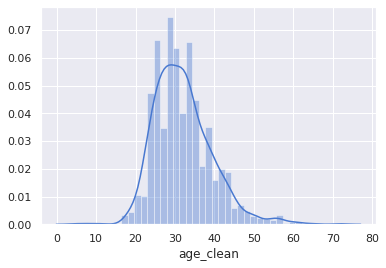

In [11]:
# Plot a histogram of the respondents' ages (remove any NaN values)

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(mh["age_clean"].dropna());

#### Observations
- Peak between mid-20s to about mid-40s.  

#### Questions that come up:
- How does <strong>age</strong> relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

#### 4D: Standardize gender into categories

I have decided to consolidate the gender variable into the following categories, given the nature and quantities of the open-ended responses.

- Male (cis)
- Male (trans)
- Female (cis)
- Female (trans)
- Other

Once again, I adapted the process used by Kaggler shivamnijhawan96: https://www.kaggle.com/shivamnijhawan96/mental-health-survey-exploration. (Thanks!)

##### Suggestion for the future:
Future surveys might consider restructuring the sex/gender questions to reduce the frequency of "other" while remaining transgender-inclusive. One potential method is described in this study from May 2017: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5444783/)

In [12]:
# Recategorize each response into these categories: Male (cis), Male (trans), Female (cis), Female (trans), Other

# Standardize the capitalization in the responses by making all characters lower case
mh['gender'] = mh['gender'].str.lower()

# Make a copy of the column to preserve the original data. I will work with the new column going forward.
mh['gender_new'] = mh['gender']

# Assign each type of response to one of the five categories

male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr","cis man", "cis male"]
trans_male = [None]
trans_female = ["trans-female",  "trans woman", "female (trans)"]
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
other = ["non-binary", "nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "neuter", "queer", "ostensibly male, unsure what that really means", "queer/she/they", "something kinda male?"]

mh['gender_new'] = mh['gender_new'].apply(lambda x:"Male (Cis)" if x in male else x)
mh['gender_new'] = mh['gender_new'].apply(lambda x:"Female (Cis)" if x in female else x)
mh['gender_new'] = mh['gender_new'].apply(lambda x:"Female (Trans)" if x in trans_female else x)
mh['gender_new'] = mh['gender_new'].apply(lambda x:"Male (Trans)" if x in trans_male else x)
mh['gender_new'] = mh['gender_new'].apply(lambda x:"Other" if x in other else x)
mh.drop(mh[mh.gender_new == 'p'].index, inplace=True)
mh.drop(mh[mh.gender_new == 'a little about you'].index, inplace=True)

# Make a crosstab to view the count for each of the new categories
print("Gender:")
print("How many values are NaN?: ", pd.isnull(mh['gender_new']).sum())
print("")
print("Frequency table for gender_new:\n", mh["gender_new"].value_counts().sort_index(0))
print("")

# Confirm that no entries were missed in the sorting above: display the size of the old and new variables, and of the entire dataset
print("If we didn't miss any entries, these numbers will be the same:")
print("gender =", len(mh['gender']), "values")
print("gender_new =", len(mh['gender_new']), "values")
print("Dataset Entries =", len(mh), "values")

Gender:
How many values are NaN?:  0

Frequency table for gender_new:
 Female (Cis)      247
Female (Trans)      4
Male (Cis)        991
Other              15
Name: gender_new, dtype: int64

If we didn't miss any entries, these numbers will be the same:
gender = 1257 values
gender_new = 1257 values
Dataset Entries = 1257 values


#### View the gender distribution of the sample

<AxesSubplot:>

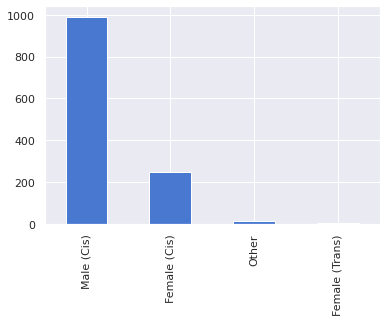

In [13]:
# Create a bar chart comparing gender

mh['gender_new'].value_counts().plot(kind='bar')

#### Observations
- The large majority are Male (Cis). This isn't a surprise since it's focused on the tech industry.
- There are no Male (Trans) entries, which I do find a little surprising. 
- Almost certainly, at least some of the respondents that I grouped into "Other" would have chosen one of the other four options if they'd been given the option to self-sort. So this is an imperfect solution, but I still consider it a reasonable one given what we have available to us.

#### Questions that come up:
- How does <strong>gender</strong> relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

#### 4E: Decide how to handle NaN data in the categorical columns
- There are three variables with many missing values. None of them points to a need to "fill in" the missing responses or delete the rows. More detail:
 - <strong>state</strong>:  the missing values are likely to occur in the instances where the country is not "United States". This can be confirmed below.
 - <strong>work_intefere</strong>:  the missing values indicate that the respondent skipped the question because it does not apply to them, which is important information. We can infer that missing responses means the respondent is not experiencing a mental illness at the moment. 
 - <strong>comments</strong>:  this missing values indicate that the respondent didn't leave a comment, which was optional.
 
##### Questions that come up:
- How many values for <strong>state</strong> are blank when the <strong>country</strong> is "United States"? In other words, when <strong>state</strong> shouldn't be blank?

<a id="step5"></a>
### Step 5: Identify patterns in the data

#### 5A: treatment v. work_interfere

##### Questions that come up: 
- Is it possible to run an accurate correlation calculation with two categorical variables? Below I run it three ways.

In [14]:
# Create a new dataframe with the two columns and assign numbers in place of their categories

df = pd.DataFrame({'treatment': mh['treatment'], 'work_interfere': mh['work_interfere']}, dtype='category')
df_num = df.apply(lambda x: x.cat.codes)

# Run a correlation calculation 
print("Pearson:", df_num.corr())
print("")
print("Spearman:", df_num.corr('spearman'))
print("")
print("Kendall:", df_num.corr('kendall'))

Pearson:                 treatment  work_interfere
treatment        1.000000        0.615657
work_interfere   0.615657        1.000000

Spearman:                 treatment  work_interfere
treatment        1.000000        0.598444
work_interfere   0.598444        1.000000

Kendall:                 treatment  work_interfere
treatment        1.000000        0.541358
work_interfere   0.541358        1.000000


#### 5B:  Chart: mental health benefits v. seeking treatment

Whether an employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.

##### Questions that come up:
- How to determine if this is a statistically significant correlation? 

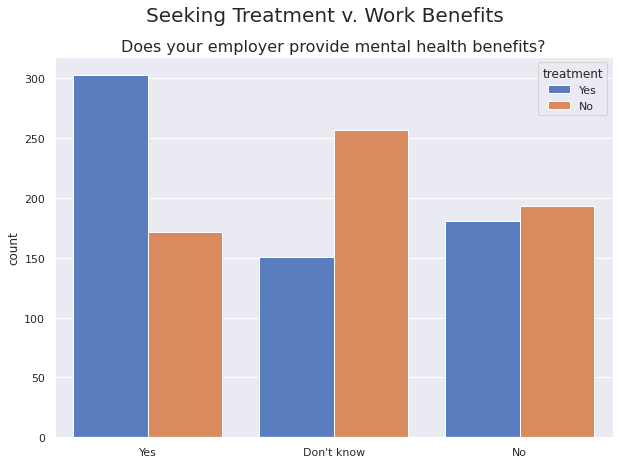

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x="benefits", hue="treatment", hue_order = ["Yes", "No"], data=mh)
plt.title("Does your employer provide mental health benefits?",fontsize=16)
plt.suptitle("Seeking Treatment v. Work Benefits", fontsize=20)
plt.xlabel("")
plt.show()

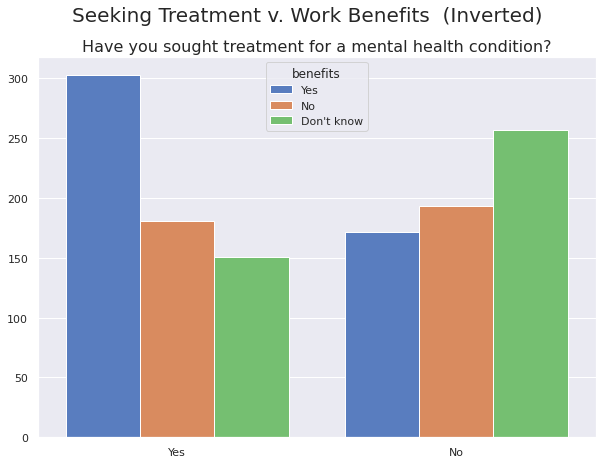

In [16]:
 # Generate a chart comparing mental health benefits and treatment
    
plt.figure(figsize=(10,7))
sns.countplot(x="treatment", hue="benefits", hue_order = ["Yes", "No", "Don't know"], data=mh)
plt.suptitle("Seeking Treatment v. Work Benefits  (Inverted)", fontsize=20)
plt.title("Have you sought treatment for a mental health condition?",fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

#### 5C:  Chart: family history v. seeking treatment

There appears to be a pretty clear correlation between these two variables, too.

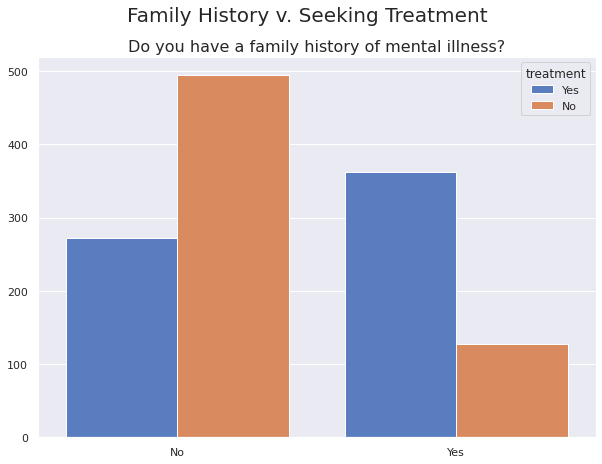

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x="family_history", hue="treatment", hue_order = ["Yes", "No"], data=mh)
plt.suptitle("Family History v. Seeking Treatment", fontsize=20)
plt.title("Do you have a family history of mental illness?", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

#### 5C.1 Chi-Squared Test of Independence
I would like to calculate whether these variables are statistically independent of each other. First, I will try a chi-squared test of independence. (Adapting the process from: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html) 

In [18]:
# Generate crosstabs of "family history" and "treatment" (the "observed" values)

import scipy.stats as stats

tab_famhist_treatment = pd.crosstab(mh["family_history"], mh["treatment"], margins = True)
tab_famhist_treatment.columns = ["Treatment Yes","Treatment No","row_totals"]
tab_famhist_treatment.index = ["Fam Hist Yes","Fam Hist No","col_totals"]

observed = tab_famhist_treatment.iloc[0:2,0:2]   # Get table without totals for later use

tab_famhist_treatment

,Treatment Yes,Treatment No,row_totals
Fam Hist Yes,495,272,767
Fam Hist No,127,363,490
col_totals,622,635,1257


In [19]:
# Generate the "expected" values to compare against our "observed" values

expected =  np.outer(tab_famhist_treatment["row_totals"][0:2],
                     tab_famhist_treatment.loc["col_totals"][0:2]) / 1257

expected = pd.DataFrame(expected)

expected.columns = ["Treatment Yes","Treatment No"]
expected.index = ["Fam Hist Yes","Fam Hist No"]

expected

,Treatment Yes,Treatment No
Fam Hist Yes,379.533811,387.466189
Fam Hist No,242.466189,247.533811


In [20]:
# Run the Chi-Squared test

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

# Note: We call .sum() twice: once to get the column sums and a second time to 
# add the column sums together, returning the sum of the entire 2D table.

178.38566252465614


In [21]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

# *Note: The degrees of freedom for a test of independence equals the product of 
# the number of categories in each variable minus 1. In this case we have a 2x2 table 
# so df = 1x1 = 1.

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


##### Observation: 
A P value of 0.0 does not seem right. I will go back to further investigate whether the chi-squared is appropriate and if I made mistakes in the code above.

<a id="step6"></a>
### Step 6: Answer Kaggle's questions about the data

#### 6A: How does the frequency of mental health illness vary by geographic location?

I will explore the <strong>state</strong> data and its relationship to the frequency of mental health illness. A response to <strong>work_interfere</strong> will be inferred to mean that the respondent experienced a mental health condition at the time of their response. From a non-response I will infer the non-existence of a mental health condition.

I will group the states into four regions according to the <a href="https://commons.wikimedia.org/w/index.php?curid=10687031" target="_blank">US Census Bureau</a> to make it a more manageable comparison. 

In [22]:
# Display the distinct countries represented in the data (quantity and names)

print("Country Count =", len(set(mh['country'])))
print("Country Names =", set(mh['country']))

Country Count = 47
Country Names = {'Australia', 'Nigeria', 'United States', 'Bulgaria', 'Uruguay', 'Denmark', 'Portugal', 'Poland', 'Costa Rica', 'Czech Republic', 'South Africa', 'China', 'Switzerland', 'Norway', 'Philippines', 'United Kingdom', 'Japan', 'Croatia', 'Mexico', 'India', 'Romania', 'Canada', 'Finland', 'Georgia', 'Spain', 'Hungary', 'Singapore', 'Netherlands', 'Greece', 'Zimbabwe', 'Latvia', 'Germany', 'New Zealand', 'Italy', 'Thailand', 'Ireland', 'Moldova', 'Brazil', 'Russia', 'Sweden', 'Austria', 'France', 'Colombia', 'Belgium', 'Bosnia and Herzegovina', 'Slovenia', 'Israel'}


In [23]:
# Display quantity and names of distinct countries represented in the data (quantity and names)

print("State Count =", len(set(mh['state'])))
print("State Names =", set(mh['state']))
print(mh['state'].describe())

State Count = 46
State Names = {nan, 'SC', 'IN', 'TX', 'IA', 'DC', 'TN', 'UT', 'WV', 'MO', 'VT', 'NM', 'WY', 'VA', 'MN', 'CT', 'KY', 'RI', 'KS', 'OK', 'WA', 'LA', 'NE', 'ME', 'NV', 'MI', 'NC', 'MA', 'OR', 'NH', 'SD', 'ID', 'FL', 'IL', 'AZ', 'MD', 'WI', 'NJ', 'GA', 'CA', 'AL', 'PA', 'MS', 'OH', 'CO', 'NY'}
count     742
unique     45
top        CA
freq      138
Name: state, dtype: object


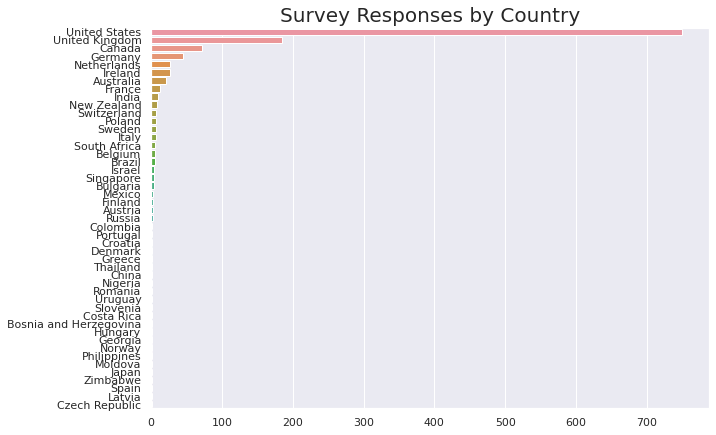

In [24]:
# Create a frequency chart for "country"

plt.figure(figsize=(10, 7))
sns.countplot(y='country', order = mh['country'].value_counts().index, data=mh)
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

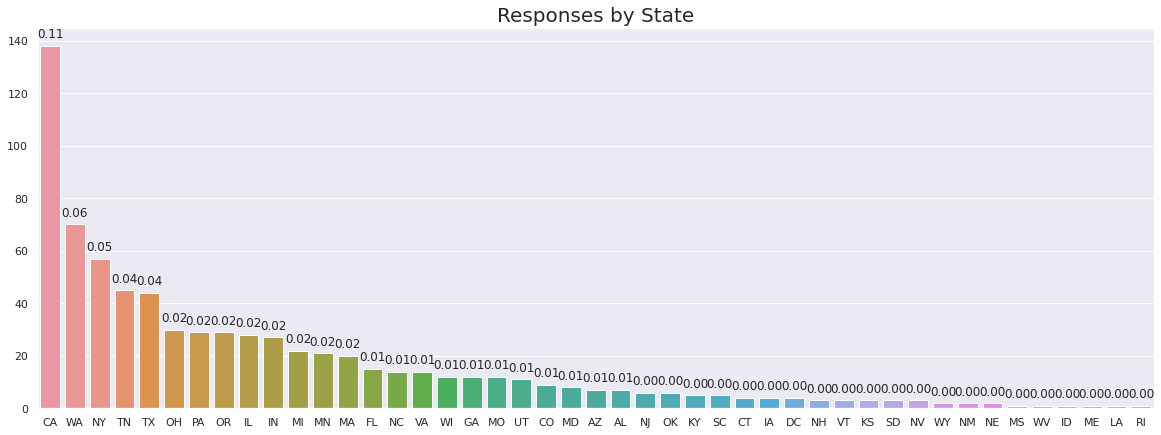

In [25]:
#### Survey Responses by state

total = float(len(mh))
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='state', order = mh['state'].value_counts().index, data=mh)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Responses by State', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

col_0      count
region          
Midwest      164
Northeast    124
South        182
West         272
If we didn't miss anything, this will equal 1257: 1257


<AxesSubplot:xlabel='region'>

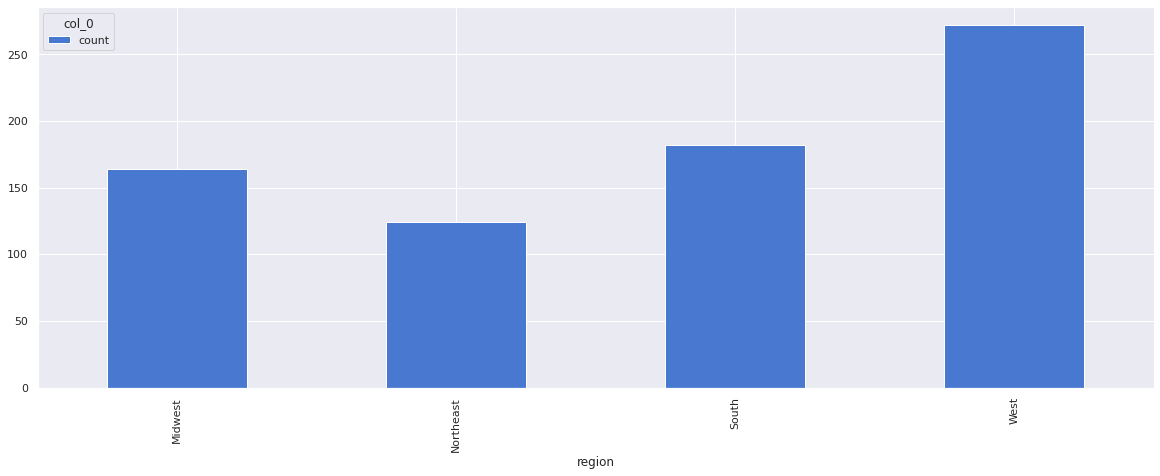

In [26]:
# Define how to recategorize each state into one of the US Census Bureau regions: West, Midwest, South, Northeast

# Mke a copy of the column to preserve the original data. Work with the new column going forward.
mh['region'] = mh['state']

# Then, in the new column, assign each type of response to one of the new categories

west = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
northeast = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
south = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]

mh['region'] = mh['region'].apply(lambda x:"West" if x in west else x)
mh['region'] = mh['region'].apply(lambda x:"Midwest" if x in midwest else x)
mh['region'] = mh['region'].apply(lambda x:"Northeast" if x in northeast else x)
mh['region'] = mh['region'].apply(lambda x:"South" if x in south else x)

# Make a crosstab to view the count for each of the new categories
region_tab = pd.crosstab(index=mh["region"], columns="count")

print(region_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(mh['region']))

region_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True)

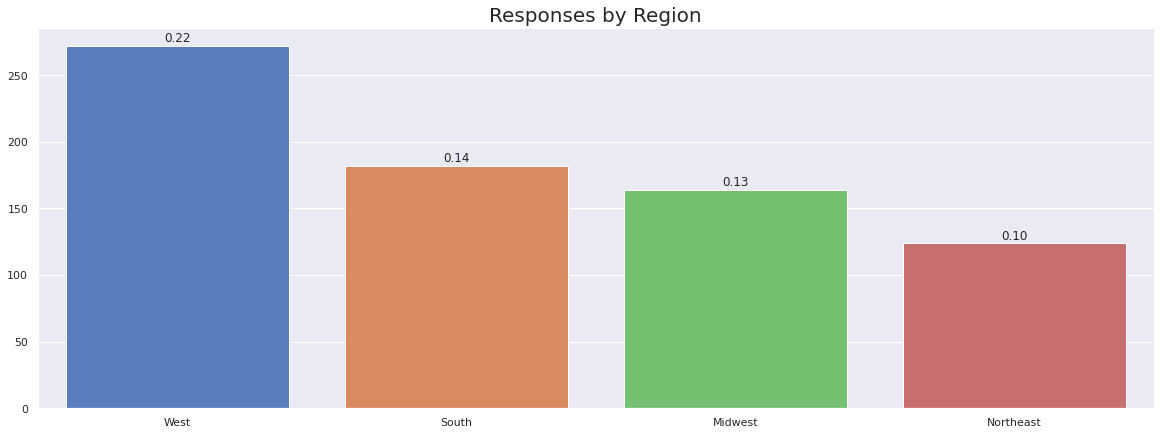

In [27]:
#### Survey Responses by region

total = float(len(mh))
plt.figure(figsize=(20, 7))
ax = sns.countplot(x='region', order = mh['region'].value_counts().index, data=mh)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Responses by Region', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

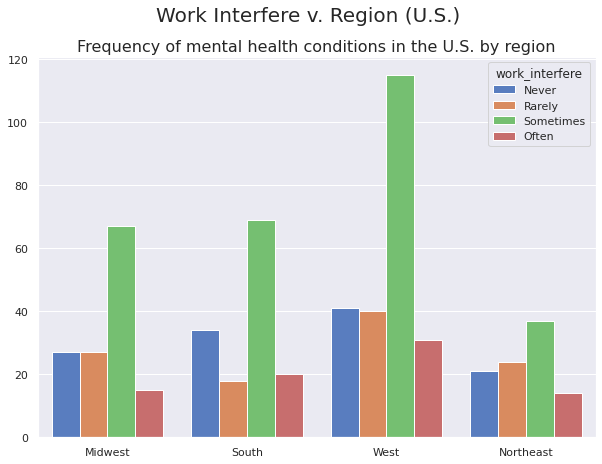

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="work_interfere", hue_order = ["Never", "Rarely", "Sometimes", "Often"], data=mh)
plt.suptitle("Work Interfere v. Region (U.S.)", fontsize=20)
plt.title("Frequency of mental health conditions in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [29]:
mh['work_interfere']

0           Often
1          Rarely
2          Rarely
3           Often
4           Never
          ...    
1254          NaN
1255        Often
1256    Sometimes
1257          NaN
1258    Sometimes
Name: work_interfere, Length: 1257, dtype: object

col_0  count
ill         
No       264
Yes      993
If we didn't miss anything, this will equal 1257: 1257


<AxesSubplot:xlabel='ill'>

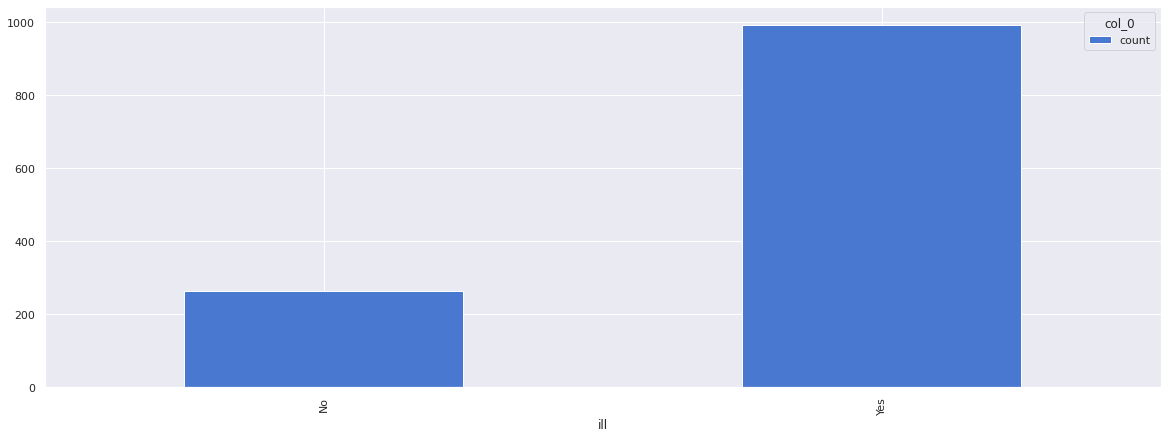

In [30]:
# Convert the work_interfere responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
mh['ill'] = mh['work_interfere']

# Transform all NaN to "No" (which means, not currently experiencing a mental health condition)
mh['ill'] = mh['ill'].replace(np.nan, 'No', regex=True)

# Assign each type of response to one of two categories

notill = ["No"]
ill = ["Never", "Rarely", "Sometimes", "Often"]

mh['ill'] = mh['ill'].apply(lambda x:"Yes" if x in ill else x)
mh['ill'] = mh['ill'].apply(lambda x:"No" if x in notill else x)

# Make a crosstab to view the count for each of the new categories
ill_tab = pd.crosstab(index=mh["ill"], columns="count")

print(ill_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(mh['ill']))

ill_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True)

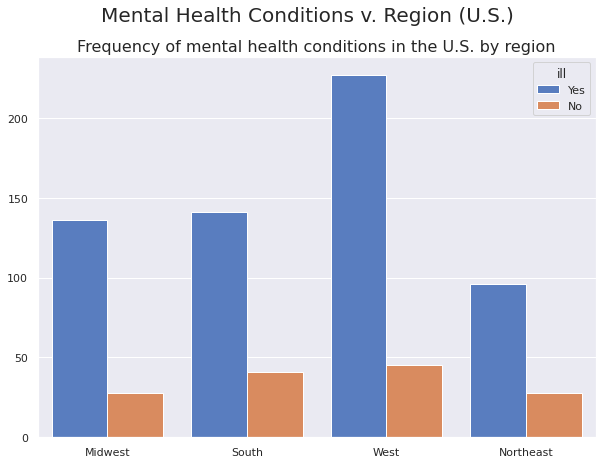

In [31]:
# Display the relationship between "ill" and "region"

plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="ill", hue_order = ["Yes", "No"], data=mh)
plt.suptitle("Mental Health Conditions v. Region (U.S.)", fontsize=20)
plt.title("Frequency of mental health conditions in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

#### 6B: How do attitudes towards mental health vary by geographic location?

I will explore the <strong>region</strong> data and its relationship to attitudes towards mental health. A "No" response to <strong>mental_health_consequence</strong>  ("Do you think that discussing a mental health issue with your employer would have negative consequences?") will be inferred to represent positive attitudes toward mental health, while a "Yes" response will represent negative attitudes.

col_0      count
attitudes       
Moderate     477
Negative     290
Positive     490
If we didn't miss anything, this will equal 1257: 1257
AxesSubplot(0.125,0.125;0.775x0.755)


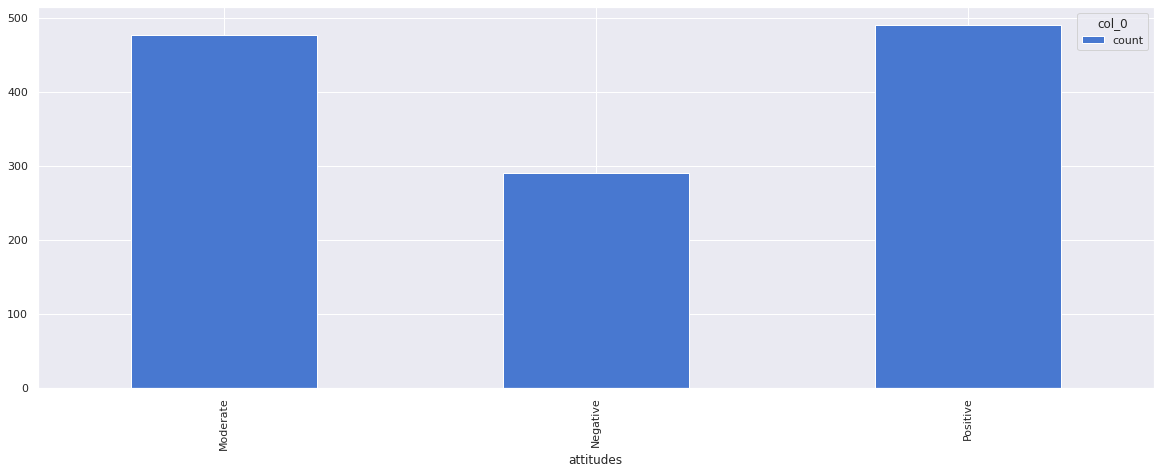

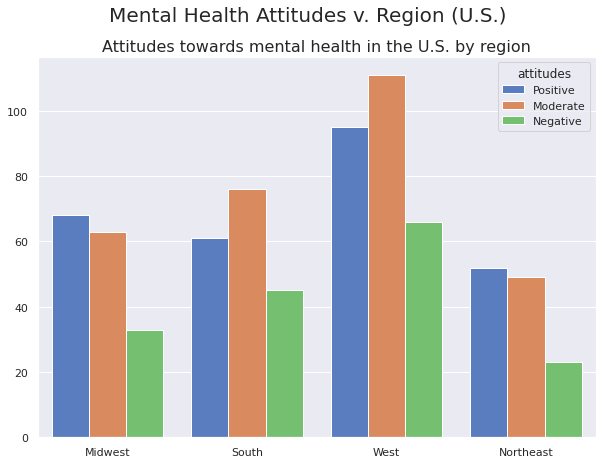

None


In [32]:
# Convert the mental_health_consequence responses into a new variable, 

# Make a copy of the column to preserve the original data. Work with the new column going forward.
mh['attitudes'] = mh['mental_health_consequence']

# Assign each type of response to one of two categories
positive = ["No"]
negative = ["Yes"]
moderate = ['Maybe']

mh['attitudes'] = mh['attitudes'].apply(lambda x:"Positive" if x in positive else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Negative" if x in negative else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Moderate" if x in moderate else x)


# Make a crosstab to view the count for each of the new categories
attitudes_tab = pd.crosstab(index=mh["attitudes"], columns="count")

print(attitudes_tab)

# Confirm that we didn't miss any entries
print("If we didn't miss anything, this will equal 1257:", len(mh['attitudes']))

print(attitudes_tab.plot(kind="bar", 
                 figsize=(20,7),
                 stacked=True))


# Display the relationship between "mental_health_consequence" and "region"

plt.figure(figsize=(10,7))
sns.countplot(x="region", hue="attitudes", hue_order = ["Positive", "Moderate", "Negative"], data=mh)
plt.suptitle("Mental Health Attitudes v. Region (U.S.)", fontsize=20)
plt.title("Attitudes towards mental health in the U.S. by region", fontsize=16)
plt.xlabel("")
plt.ylabel("")
print(plt.show())

## Next up:  6C- What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?


## Next up: all of these charts are in raw numbers. How to show proportions, instead? 

This analysis is a living document and I am continuing to explore new, deeper questions with each iteration.  I will update this occasionally with the latest version.

Thank you for reading! Please contact me with any questions or thoughts. -Liz